# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 dias em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).</span>



## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  data do registro                                   | texto        |
| id_cliente              |  número de identificação do cliente                 | inteiro      |
| sexo                    |  M = 'Masculino'; F = 'Feminino'                    | texto        |
| posse_de_veiculo        |  Y = 'possui'; N = 'não possui'                     | binário      |
| posse_de_imovel         |  Y = 'possui'; N = 'não possui'                     | binário      |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)     | texto        |
| educacao                |  Nível de educação (ex: secundário, superior etc)   | texto        |
| estado_civil            |  Estado civil (ex: solteiro, casado etc)            | texto        |
| tipo_residencia         |  tipo de residência (ex: casa/apartamento)          | texto        |
| idade                   |  tempo de emprego em anos                           | inteiro      |
| tempo_emprego           |  Indica se possui celular (1 = sim, 0 = não)        | decímal      |
| qt_pessoas_residencia   |  quantidade de pessoas na residência                | decímalI     |
| renda                   |  idicação do valor da renda                         | decímal      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('agg')
import streamlit as st
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [4]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [6]:
renda.head(3)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




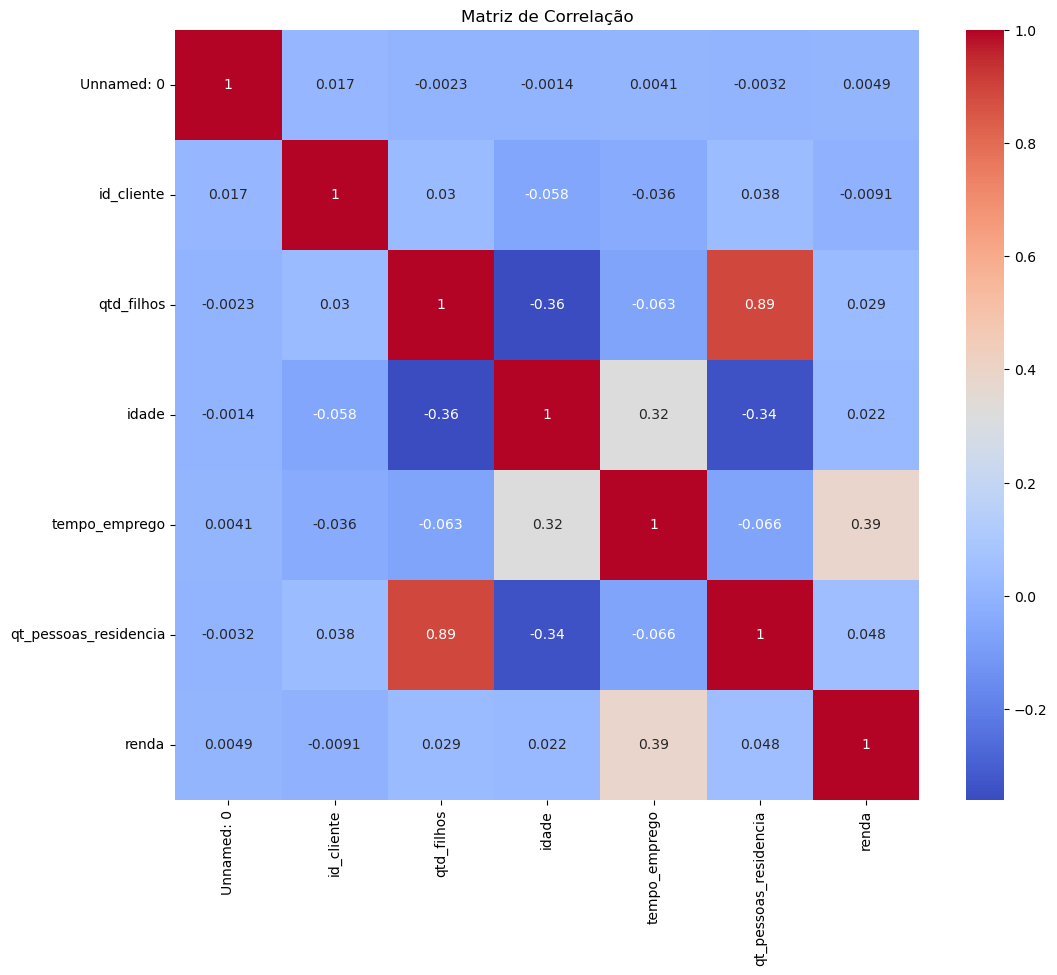

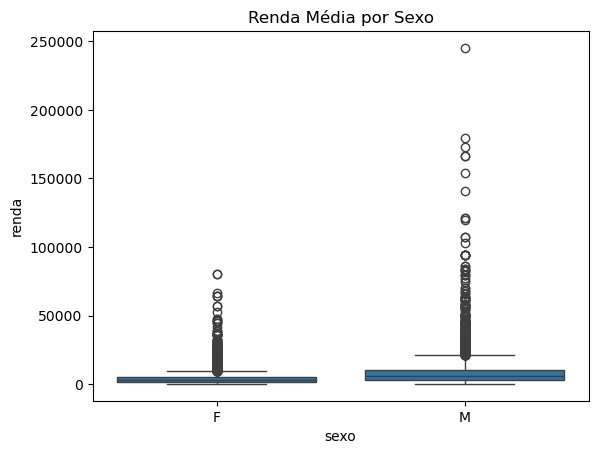

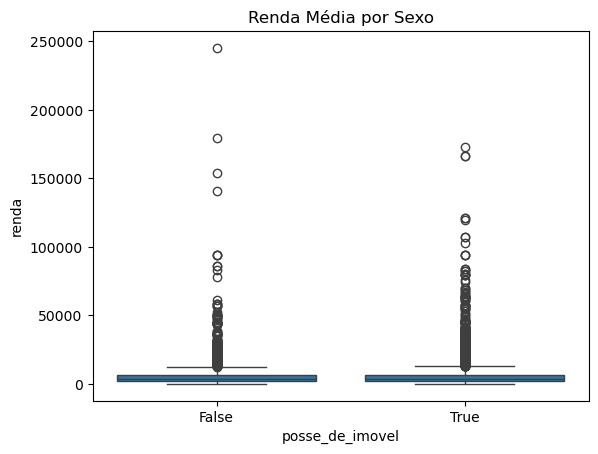

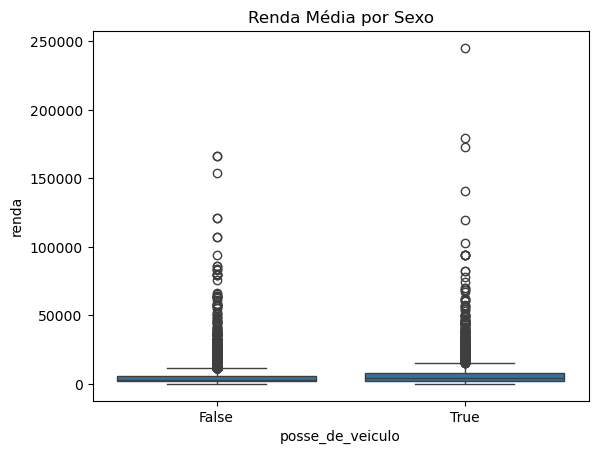

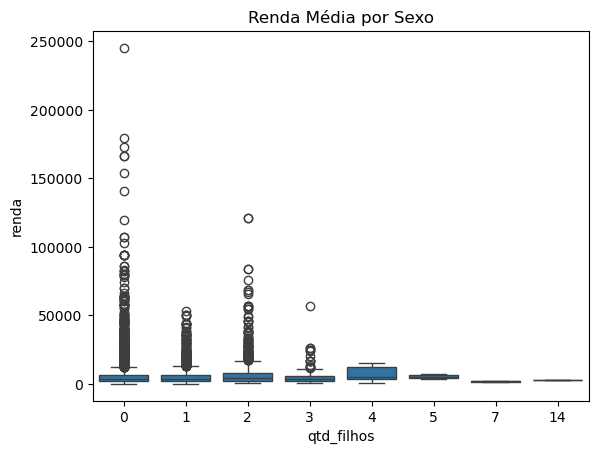

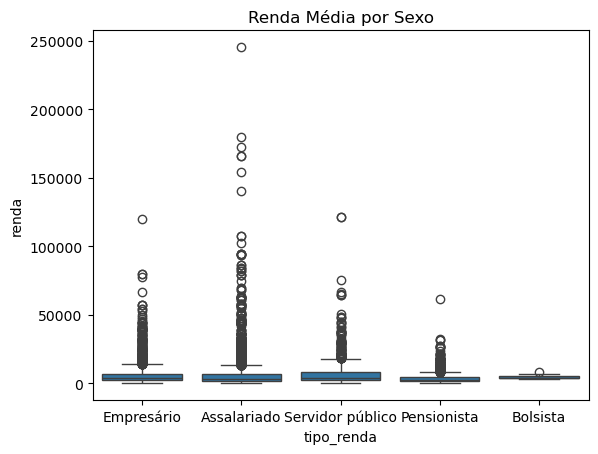

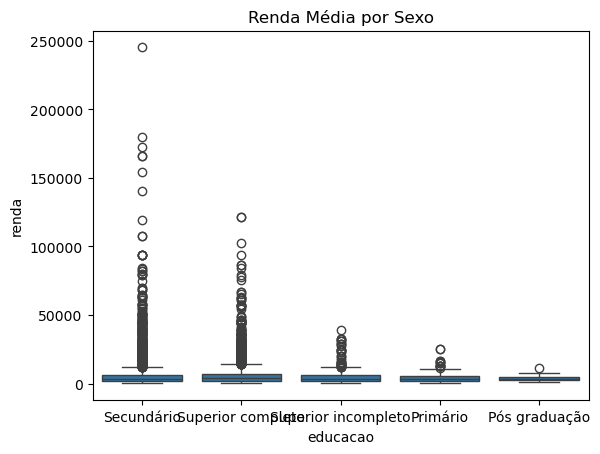

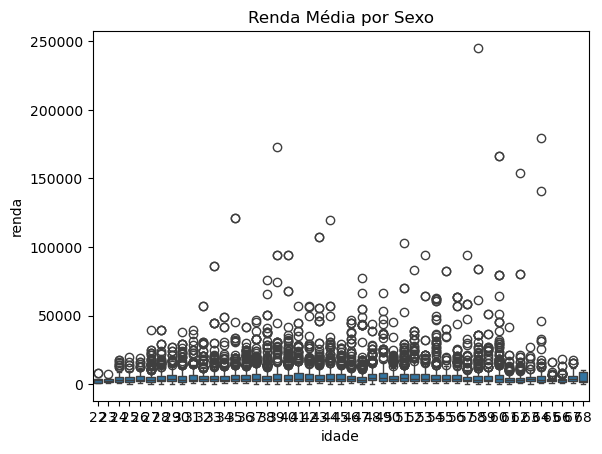

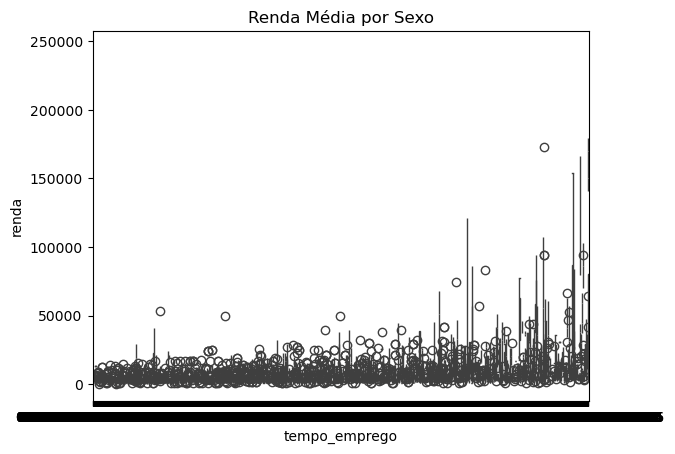

In [9]:
%matplotlib inline

renda = pd.read_csv("previsao_de_renda.csv")

# Selecionar as colunas numéricas
numeric_cols = renda.select_dtypes(include=['number']).columns

# Calcular a matriz de correlação
correlation_matrix = renda[numeric_cols].corr()

# Criar o gráfico de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# Boxplot para comparar a renda média por sexo
sns.boxplot(x='sexo', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por posse de imovel
sns.boxplot(x='posse_de_imovel', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por posse de veiculo
sns.boxplot(x='posse_de_veiculo', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por quantidade de filhos
sns.boxplot(x='qtd_filhos', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por tipo de renda
sns.boxplot(x='tipo_renda', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por educação
sns.boxplot(x='educacao', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por idade
sns.boxplot(x='idade', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

# Boxplot para comparar a renda média por tempo no emprego
sns.boxplot(x='tempo_emprego', y='renda', data=renda)
plt.title('Renda Média por Sexo')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [10]:
renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean(), inplace=True)
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_11452\132703984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean(), inplace=True)


In [11]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">A primeira técnica de modelagem utilizada foi a regressão linear </span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [13]:
X = renda.drop(['renda', 'data_ref'], axis=1) 
y = renda['renda'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train) 

print(model.coef_)
print(model.intercept_)

[-4.85994973e-03 -7.98838436e-03  1.03821329e+02  3.78609956e+02
 -8.84610221e+02  4.73994492e+01  5.60112583e+02  1.05864365e+03
 -2.99790905e+03  2.99790905e+03  4.54271937e+02 -1.07337949e+03
  1.29007699e+03 -1.15586230e+03  4.84892868e+02 -1.28636677e+02
  2.26930487e+02 -4.77301647e+01  5.72246822e+02 -6.22810467e+02
 -3.27737045e+02  4.96877515e+02  2.91552262e+02 -8.05193045e+02
  3.44500313e+02 -1.80715836e+01 -3.44691884e+01 -8.75412033e+01
 -2.41917329e+02 -1.84856547e+02  5.66855851e+02]
-2073.989115650522


In [16]:
y_pred = model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAE:', mae)

MSE: 40935346.20204394
RMSE: 6398.073632121152
R²: 0.2602482667728693
MAE: 3433.8627114633796


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">Pela análise gerada podemos perceber que a relação entre as variáveis independentes com a variável dependente não é de forma linear, por isso o baixo resultado obtido pela análise regressão linear. Nesse caso será necessário estudar um novo modelo para encontrar a relação mais compatível entre as variáveis estudadas.</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.